## Crude Oil Price Forecasting

#### Import Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Dataset

In [3]:
data = pd.read_csv("spot-prices-for-crude-oil.csv")
data.head()

,Date;Brent Spot Price (U.S. Dollars per Barrel);WTI Spot Price (U.S. Dollars per Barrel)
0,2021-11-26;72.37;
1,2020-01-20;64.63;
2,2017-07-04;49.15;
3,2017-01-16;54.3;
4,2021-11-17;80.67;78.32


In [5]:
data = pd.read_csv("spot-prices-for-crude-oil.csv", sep=";", index_col="Date")

In [6]:
data.head()

,Brent Spot Price (U.S. Dollars per Barrel),WTI Spot Price (U.S. Dollars per Barrel)
Date,,
2021-11-26,72.37,NaN
2020-01-20,64.63,NaN
2017-07-04,49.15,NaN
2017-01-16,54.30,NaN
2021-11-17,80.67,78.32


In [12]:
data.rename(columns={'Brent Spot Price (U.S. Dollars per Barrel)': 'Brent Spot Price',
             'WTI Spot Price (U.S. Dollars per Barrel)': 'WTI Spot Price'},inplace=True)

In [13]:
data.head()

,Brent Spot Price,WTI Spot Price
Date,,
2021-11-26,72.37,NaN
2020-01-20,64.63,NaN
2017-07-04,49.15,NaN
2017-01-16,54.30,NaN
2021-11-17,80.67,78.32


In [14]:
# we are intersted in predicting price of Brent Spot Price so we will 
# keep only that column

In [16]:
df = data.drop("WTI Spot Price", axis = 1)

In [17]:
df.head()


,Brent Spot Price
Date,
2021-11-26,72.37
2020-01-20,64.63
2017-07-04,49.15
2017-01-16,54.30
2021-11-17,80.67


In [18]:
# Lets do EDA on df

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1718 entries, 2021-11-26 to 2015-09-07
Data columns (total 1 columns):
Brent Spot Price    1711 non-null float64
dtypes: float64(1)
memory usage: 26.8+ KB


In [25]:
df.describe()

,Brent Spot Price
count,1711.000000
mean,56.774296
std,13.772841
min,9.120000
25%,46.940000
50%,57.550000
75%,66.800000
max,86.070000


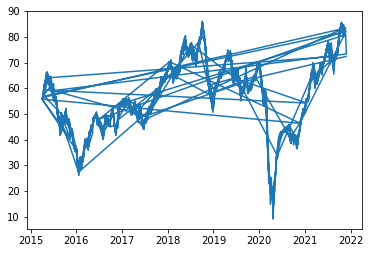

In [28]:
%matplotlib inline
plt.plot(df)

In [20]:
df.index = pd.to_datetime(df.index)
df.head()

,Brent Spot Price
Date,
2021-11-26,72.37
2020-01-20,64.63
2017-07-04,49.15
2017-01-16,54.30
2021-11-17,80.67


In [21]:
df1 = df.sort_values(by='Date')
df1.head()

,Brent Spot Price
Date,
2015-04-01,55.73
2015-04-02,55.73
2015-04-06,55.73
2015-04-07,57.55
2015-04-08,56.42


In [22]:
## Remove null values

df1.isna().sum()

Brent Spot Price    7
dtype: int64

In [31]:
df1.dropna(axis = 0, inplace=True)

In [32]:
df1.isna().sum()

Brent Spot Price    0
dtype: int64

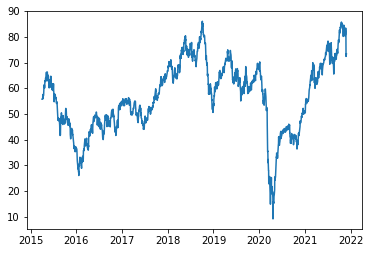

In [33]:
# plot after dropping null values
plt.plot(df1)